# Exercise - Linear Regression

Over 370,000 used cars were scraped from Ebay-Kleinanzeigen. The content of the data is in German, so one has to translate it first to English. The data is available [here](https://www.kaggle.com/orgesleka/used-cars-database) The fields included in the file data/autos.csv are:

- seller : private or dealer
- offerType
- vehicleType
- yearOfRegistration : at which year the car was first registered
- gearbox
- powerPS : power of the car in PS
- model
- kilometer : how many kilometers the car has driven
- monthOfRegistration : at which month the car was first registered
- fuelType
- brand
- notRepairedDamage : if the car has a damage which is not repaired yet
- price : the price on the ad to sell the car. 

**Goal**  
Given the characteristics/features of the car, the sale price of the car is to be predicted. 

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
#Load the data
cars = pd.read_csv("data/autos.csv")

In [3]:
#Do basic sanity check.
#1. Look into the first few records
cars.head()

,seller,offerType,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
0,privat,Angebot,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,1500
1,privat,Angebot,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,3600
2,privat,Angebot,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,650
3,privat,Angebot,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2200
4,privat,Angebot,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein,0


In [4]:
#2. What are the column names?
cars.columns

Index(['seller', 'offerType', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'price'],
      dtype='object')

In [5]:
#3. What are the column types?
cars.dtypes

seller                 object
offerType              object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
price                   int64
dtype: object

In [6]:
#4. Do label encoding
from sklearn import preprocessing

In [7]:
cars.columns

Index(['seller', 'offerType', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage', 'price'],
      dtype='object')

In [10]:
col_object = [x for x in cars.columns if cars[x].dtype == "object"]
col_object

['seller',
 'offerType',
 'vehicleType',
 'gearbox',
 'model',
 'fuelType',
 'brand',
 'notRepairedDamage']

In [11]:
col_others = [x for x in cars.columns if cars[x].dtype != "object"]
col_others

['yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'price']

In [12]:
le = preprocessing.LabelEncoder()

In [13]:
cars_encoded_object = cars[col_object].apply(le.fit_transform)

In [14]:
cars_encoded_object.dtypes

seller               int64
offerType            int64
vehicleType          int64
gearbox              int64
model                int64
fuelType             int64
brand                int64
notRepairedDamage    int64
dtype: object

In [15]:
cars_encoded = pd.concat([cars_encoded_object, cars[col_others]],axis = 1)

In [16]:
cars_encoded.head()

,seller,offerType,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,yearOfRegistration,powerPS,kilometer,monthOfRegistration,price
0,1,0,4,1,118,1,37,1,2001,75,150000,6,1500
1,1,0,4,1,103,3,31,1,2008,69,90000,7,3600
2,1,0,6,1,11,1,2,0,1995,102,150000,10,650
3,1,0,2,1,8,1,25,1,2004,109,150000,8,2200
4,1,0,6,1,40,1,37,1,1980,50,40000,7,0


In [17]:
cars_encoded.columns

Index(['seller', 'offerType', 'vehicleType', 'gearbox', 'model', 'fuelType',
       'brand', 'notRepairedDamage', 'yearOfRegistration', 'powerPS',
       'kilometer', 'monthOfRegistration', 'price'],
      dtype='object')

In [18]:
#5. Ideally, we would do some exploratory analysis. 
#For practice, plot: year of registration vs price


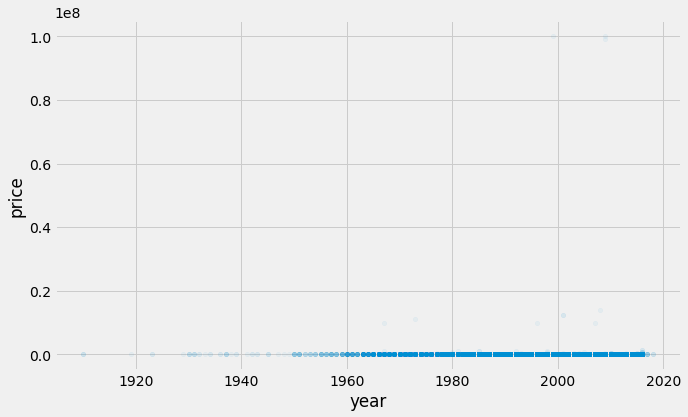

In [19]:
plt.scatter(cars_encoded.yearOfRegistration, 
           cars_encoded.price,
           s=20, alpha = 0.05)
plt.xlabel('year')
plt.ylabel('price')

In [20]:
cars_encoded['log10price'] = np.log10(cars_encoded.price + 1)

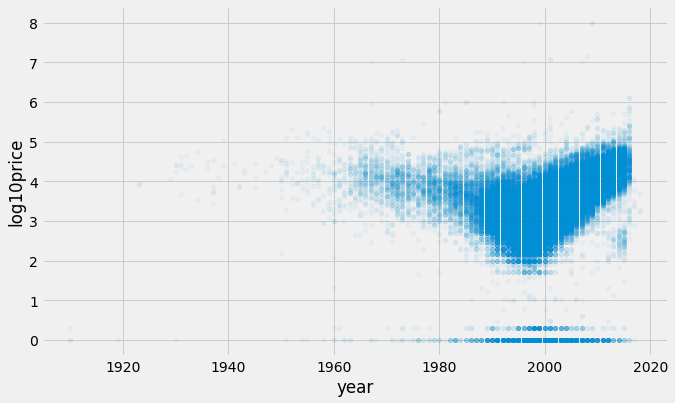

In [21]:
plt.scatter(cars_encoded.yearOfRegistration, cars_encoded.log10price,
           s=20, alpha = 0.05)
plt.xlabel('year')
plt.ylabel('log10price')

In [22]:
#Plot of month of registration with price

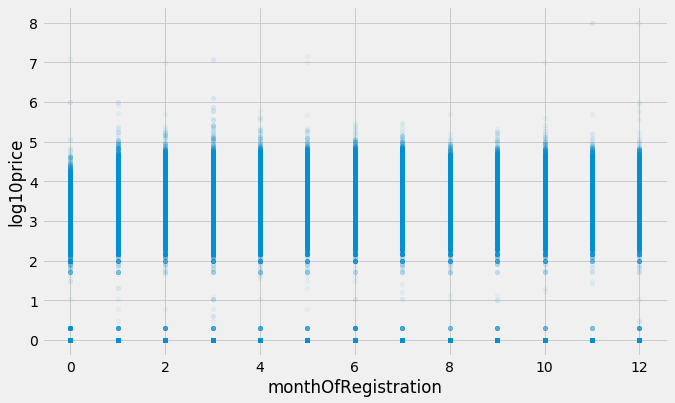

In [23]:
plt.scatter(cars_encoded.monthOfRegistration, cars_encoded.log10price,
           s=20, alpha = 0.05)
plt.xlabel('monthOfRegistration')
plt.ylabel('log10price')

In [24]:
cars_encoded.head()

,seller,offerType,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,yearOfRegistration,powerPS,kilometer,monthOfRegistration,price,log10price
0,1,0,4,1,118,1,37,1,2001,75,150000,6,1500,3.176381
1,1,0,4,1,103,3,31,1,2008,69,90000,7,3600,3.556423
2,1,0,6,1,11,1,2,0,1995,102,150000,10,650,2.813581
3,1,0,2,1,8,1,25,1,2004,109,150000,8,2200,3.342620
4,1,0,6,1,40,1,37,1,1980,50,40000,7,0,0.000000


In [25]:
y = cars_encoded.iloc[:,-1]

In [26]:
X = cars_encoded.iloc[:,0:12]

In [27]:
# From sklearn import the linear models
from sklearn import linear_model

In [28]:
model_ols = linear_model.LinearRegression()

In [29]:
model_ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
model_ols.coef_

array([ -3.44100506e-01,  -2.48931559e+00,  -1.45016778e-02,
        -2.15433457e-01,  -1.72855546e-04,   7.75851320e-02,
        -2.21562066e-03,   4.63360547e-01,   3.18689809e-02,
         5.22540972e-04,  -3.43232660e-06,   5.24214376e-03])

In [31]:
model_ols.intercept_

-59.912081033556944

In [32]:
y_ols = model_ols.predict(X)

In [33]:
from sklearn import metrics

In [34]:
#7. Report the diagnostics. And discuss the results
metrics.mean_squared_error(y_ols,y)

0.26061808366881362

In [35]:
#8. Build L2 Regression using sklearn - linear_model.Ridge 


In [36]:
from sklearn.linear_model import Ridge

In [120]:
model_ridge = Ridge(alpha=10e10)

In [121]:
model_ridge.fit(X, y)

Ridge(alpha=100000000000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [122]:
model_ridge.coef_

array([  3.12292970e-12,  -1.02760799e-10,   6.50003153e-09,
        -1.54680630e-07,  -2.87347351e-06,   4.69374603e-07,
        -2.25296042e-06,   1.33893300e-07,   3.76199402e-06,
         4.33738513e-05,  -5.73678960e-06,   3.34487916e-07])

In [123]:
sum(model_ridge.coef_)

3.7062097352428309e-05

In [108]:
y_ridge = model_ridge.predict(X)

In [42]:
metrics.mean_squared_error(y_ridge,y)

0.26071136846619347

In [43]:
#9. Try with different values of alpha (0.001, 0.01, 0.05, 0.1, 0,5)


10.
The following code is from sklearn [official documentation](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)

```
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

#compute paths
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

#Display results
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
```

Can you modify this code to plot for 10 values of alpha and see how weights get changed ?

In [57]:
X_std = preprocessing.StandardScaler().fit_transform(X)

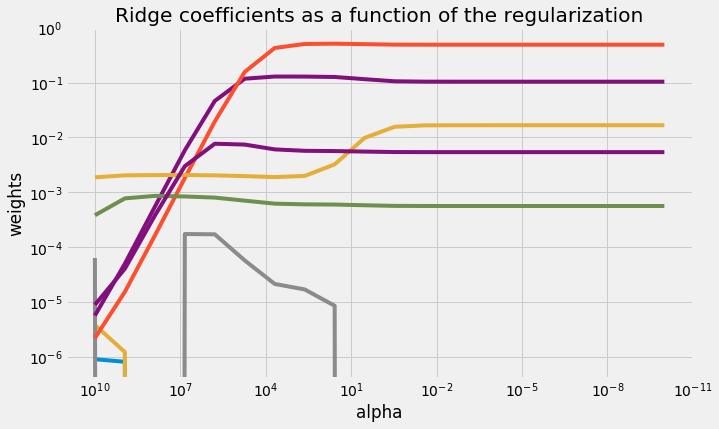

In [136]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

#compute paths
n_alphas = 20
alphas = np.logspace(-10, 10, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)

#Display results
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [137]:
#11. Build a L1 Linear Model
from sklearn.linear_model import Lasso

In [138]:
model_lasso = Lasso(alpha=0.1, fit_intercept = False)

In [139]:
model_lasso.fit(X, y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [140]:
model_lasso.coef_

array([ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   9.06125056e-05,   6.15534174e-02,
        -3.52407975e-03,   0.00000000e+00,   2.04062618e-03,
         8.09221369e-04,  -5.82902308e-06,   8.85392698e-04])

In [141]:
np.sum(model_lasso.coef_)

0.061849361425333364

In [142]:
#12. Feature selection from L1 Linear Model

In [143]:
from sklearn.feature_selection import SelectFromModel

In [144]:
Lasso(alpha=0.1, fit_intercept = False, max_iter=10000000)

Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=10000000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [145]:
sfm = SelectFromModel(model_lasso, threshold=0.1)

In [146]:
sfm

SelectFromModel(estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        prefit=False, threshold=0.1)

In [147]:
sfm.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        prefit=False, threshold=0.1)

In [148]:
featureSel = sfm.transform(X)

/Users/amitkaps/miniconda3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [149]:
featureSel.shape

(249176, 0)

In [150]:
featureSel[:,:3]

array([], shape=(249176, 0), dtype=float64)

In [151]:
#13. Find the generalization error.
#Split dataset into two: Train and Test : 80% and 20%
from sklearn.model_selection import train_test_split

In [152]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [86]:
x_train.shape, y_train.shape

((199340, 12), (199340,))

In [88]:
#14. Build L2 Regularization model on train and predict on test

In [89]:
model_ridge = Ridge(alpha=1.0, fit_intercept=True, normalize=True)

In [90]:
model_ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [91]:
ridge_output = model_ridge.predict(x_test)

In [92]:
#15. Report the RMSE
np.sum((y_test - ridge_output)**2)

14217.47449793072